In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
from keras.optimizers import Adam
import numpy as np

train1 = "Data/readelf/train_dataset1.npz"
train2 = "Data/readelf/train_dataset2.npz"
val = "Data/readelf/val_dataset.npz"
test = "Data/readelf/test_dataset.npz"

# Load numpy array
training_dataset1 = np.load(train1)
training_dataset2 = np.load(train2)
val_dataset = np.load(val)
test_dataset = np.load(test)

x_train = np.concatenate((training_dataset1['x'], training_dataset2['x']))[:5408]
y_train = np.concatenate((training_dataset1['y'], training_dataset2['y']))[:5408]

# Swap val and test
x_test = val_dataset['x']
y_test = val_dataset['y']

x_val = test_dataset['x'][:896]
y_val = test_dataset['y'][:896]

print("No. of dataset collected: 28")
print("No limit set for data collection except skip random no of files up to 5")
print("Training shape: ", x_train.shape, y_train.shape)
print("Validation shape: ", x_val.shape, x_val.shape)
print("Test shape: ", x_test.shape, y_test.shape)

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


No. of dataset collected: 28
No limit set for data collection except skip random no of files up to 5
Training shape:  (5408, 3840, 64) (5408, 3840, 64)
Validation shape:  (896, 3840, 64) (896, 3840, 64)
Test shape:  (2278, 3840, 64) (2278, 3840, 64)


In [2]:
# Base model
model = Sequential()
model.add(LSTM(64, input_shape=(3840, 64), return_sequences=True))
model.add(Activation('sigmoid'))
model.summary()
adam = Adam(lr=0.00005)
model.compile(optimizer=adam, loss='mean_absolute_error', metrics=['mae', 'mse'])

# Fitting the model
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    shuffle=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3840, 64)          33024     
_________________________________________________________________
activation_1 (Activation)    (None, 3840, 64)          0         
Total params: 33,024
Trainable params: 33,024
Non-trainable params: 0
_________________________________________________________________
Train on 5408 samples, validate on 896 samples
Epoch 1/50
5408/5408 [==============================] - 913s 169ms/step - loss: 0.4895 - mean_absolute_error: 0.4895 - mean_squared_error: 0.2406 - val_loss: 0.4772 - val_mean_absolute_error: 0.4772 - val_mean_squared_error: 0.2296
Epoch 2/50
5408/5408 [==============================] - 907s 168ms/step - loss: 0.4061 - mean_absolute_error: 0.4061 - mean_squared_error: 0.1703 - val_loss: 0.3518 - val_mean_absolute_error: 0.3518 - val_mean_squared_error: 0.1272
Epoch 3/50
5408/5408 [=

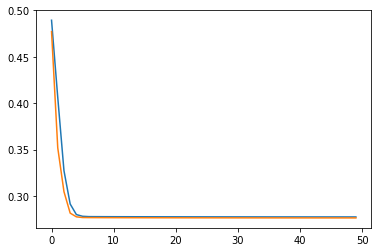

In [3]:
from matplotlib import pyplot
%matplotlib inline

# plot metrics
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])

In [4]:
test_loss = model.evaluate(x_test, y_test)

print("Test loss:", test_loss)

2278/2278 [==============================] - 81s 36ms/step
Test loss: [0.27787759578259397, 0.2778775856566073, 0.08124468089641448]


In [5]:
predictions = model.predict(x_test)
print(np.argmax(predictions[0][0]))
print(predictions[0][0])
print(predictions[0][1])
print(predictions[0][2])
print(predictions[0][3])
print(predictions[0][4])
print(predictions[1][0])
print(predictions[1][1])
print(predictions[1][2])
print(predictions[1][3])
print(predictions[1][4])

63
[0.38990673 0.37668237 0.3913964  0.4857818  0.3863949  0.37736526
 0.3473025  0.3856807  0.35738164 0.40645462 0.41414908 0.40107346
 0.3650167  0.4225824  0.3874438  0.37155446 0.39143586 0.38099715
 0.36927179 0.42088282 0.3864457  0.39732695 0.39057875 0.41258553
 0.39450562 0.35611597 0.37574935 0.388465   0.34959912 0.3748214
 0.38167927 0.43071124 0.39034867 0.36867958 0.37150905 0.3616166
 0.36070707 0.37315515 0.38778064 0.37657124 0.35529864 0.38955605
 0.37633222 0.39335924 0.4073108  0.38334128 0.36850992 0.38976312
 0.38718602 0.36386034 0.3635818  0.4259726  0.35088277 0.3940256
 0.4031572  0.373133   0.380428   0.37143385 0.37012437 0.38359216
 0.41877243 0.37435612 0.39977613 0.48885602]
[0.35205328 0.34612888 0.34700793 0.42182645 0.34341997 0.33887282
 0.3413418  0.33931062 0.34690696 0.3539821  0.34966215 0.34318787
 0.34839895 0.35739508 0.3459162  0.33093128 0.3534398  0.3397987
 0.3427486  0.36154667 0.3460271  0.35130003 0.34450695 0.35165218
 0.3490354  0.344